In [19]:
import geopandas as gpd


In [20]:
import pandas as pd

Creating a Geodataframe

In [16]:
from shapely.geometry import Point,LineString,Polygon

In [3]:
point_data = {'Location':['Archives',"Nyayo"],
                'geometry':[Point(1.2848,36.8260),Point(1.3041,36.8246)]}

line_data = {"Line":["Archives_Nyayo"],
                'geometry':[LineString([(1.2848,36.8260),(1.3041,36.8246)])]}

polygon_data = {"Name":"Polygon",
                'geometry':[Polygon([(1,1),(2,1),(2,2),(1,2)])]}

In [4]:
import geodatasets
import matplotlib.pyplot as plt

In [5]:
url = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'

districts = gpd.read_file(url)

In [10]:
districts.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.4011, 2.10352 41.40109, 2..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."


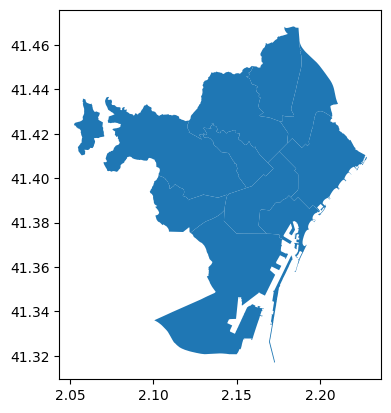

In [12]:
districts.plot()
plt.show()

In [6]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
spain = districts.to_crs(epsg=2062)

In [15]:
spain.crs

<Projected CRS: EPSG:2062>
Name: Madrid 1870 (Madrid) / Spain LCC
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Spain - mainland onshore.
- bounds: (-9.37, 35.95, 3.39, 43.82)
Coordinate Operation:
- name: Spain
- method: Lambert Conic Conformal (1SP)
Datum: Madrid 1870 (Madrid)
- Ellipsoid: Struve 1860
- Prime Meridian: Madrid

In [8]:
spain['geometry']

0    POLYGON ((1090241.744 770405.596, 1090342.582 ...
1    POLYGON ((1090448.237 771647.183, 1090453.694 ...
2    MULTIPOLYGON (((1087409.714 768620.322, 108747...
3    POLYGON ((1083492.496 771129.964, 1083500.768 ...
4    MULTIPOLYGON (((1080722.37 774743.807, 1080727...
5    POLYGON ((1086069.591 773802.861, 1086079.498 ...
6    POLYGON ((1087813.19 776824.078, 1087808.825 7...
7    POLYGON ((1089979.232 778962.76, 1089987.903 7...
8    POLYGON ((1090068.516 778346.195, 1090069.246 ...
9    POLYGON ((1091968.026 774578.598, 1091939.067 ...
Name: geometry, dtype: geometry

In [11]:
spain['areas'] = spain['geometry'].area/1000000

In [12]:
spain.head(2)

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,areas
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090241.744 770405.596, 1090342.582 ...",4.200406
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090448.237 771647.183, 1090453.694 ...",7.456303


In [13]:
spain['geometry'].bounds

,minx,miny,maxx,maxy
0,1.088630e+06,766775.874922,1.091640e+06,770572.184373
1,1.086875e+06,768501.225940,1.090495e+06,772733.885980
2,1.083720e+06,762200.011028,1.090443e+06,769628.877643
3,1.083075e+06,768376.338982,1.086968e+06,771130.819176
4,1.079068e+06,770005.676529,1.087893e+06,774897.073988
5,1.085519e+06,770802.459537,1.089190e+06,773935.124142
6,1.084749e+06,772131.008663,1.089810e+06,776905.124167
7,1.087528e+06,774222.410707,1.090249e+06,779010.604277
8,1.089372e+06,772990.161664,1.092205e+06,778346.195224
9,1.089420e+06,769690.535920,1.093823e+06,774879.256455


In [28]:
spain['geometry'].centroid

0    POINT (1090083.871 769341.012)
1    POINT (1088651.674 770409.974)
2    POINT (1087284.958 765672.155)
3    POINT (1084830.283 769641.619)
4    POINT (1083668.091 772419.768)
5    POINT (1087495.217 772409.978)
6     POINT (1087220.19 774493.588)
7     POINT (1089137.043 776526.34)
8    POINT (1090738.684 775378.323)
9    POINT (1091583.398 772387.065)
dtype: geometry

In [31]:
spain['centroid'] = spain['geometry'].centroid

In [27]:
from shapely.geometry import Point
sagrada_fam = Point([2.1744,41.4036])

sagrada_gdf = gpd.GeoSeries(sagrada_fam, crs =2062)

In [25]:
sagrada_gdf

0    POINT (2.174 41.404)
dtype: geometry

In [33]:
spain['distance'] = spain.apply(lambda a : a['centroid'].distance(sagrada_gdf),axis=1)/1000

In [34]:
spain.head(3)

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,areas,centroid,distance
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090241.744 770405.596, 1090342.582 ...",4.200406,POINT (1090083.871 769341.012),1334.203879
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090448.237 771647.183, 1090453.694 ...",7.456303,POINT (1088651.674 770409.974),1333.651179
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((1087409.714 768620.322, 108747...",22.854384,POINT (1087284.958 765672.155),1329.802354
